# Dépôts de brevets et marchés financiers : décrypter la valeur de l'innovation française par la Classification Internationale (CIB) 2017-2024
### Projet Python - ENSAE 2A
Manon Vallat, Clément Hadji, Iris Lafaille - Sous la direction de Romain Avouac

<a id="intro"></a>
## Introduction

### L'Innovation comme Boussole de la Valeur

À l'ère de l'économie de la connaissance, la capacité d’une entreprise à innover ne constitue plus seulement un avantage compétitif, mais la condition même de sa survie et de sa valorisation sur les marchés financiers. Ce projet de recherche se propose d'explorer la corrélation entre l'effort de recherche amont, matérialisé par les dépôts de brevets français, et la dynamique boursière des entreprises sur une période charnière allant de 2017 à 2024. Tandis que la plupart des analyses se concentrent sur les brevets déjà accordés, cette étude fait le choix stratégique de se focaliser sur les dépôts. Ce parti pris permet de capter le signal technologique à sa source, offrant une fenêtre inédite sur les intentions stratégiques des entreprises bien avant que leurs innovations ne se traduisent en produits commerciaux ou en rapports annuels.

Le cadre général de l'étude s'appuie sur la Classification Internationale des Brevets (CIB) pour dépasser les segmentations sectorielles traditionnelles, souvent trop rigides. En utilisant la CIB comme pivot, nous réorganisons le paysage économique français en fonction de la réalité technologique des entreprises, permettant ainsi d'identifier des mutations sectorielles "surprenantes" — par exemple, le pivot massif d'acteurs de l'énergie vers les technologies décarbonées ou l'intégration de l'IA dans l'industrie manufacturière. L'objectif central est de démontrer que le flux de dépôts, loin d'être une simple formalité administrative, agit comme un puissant réducteur d'asymétrie d'information pour les investisseurs.

Ce projet combine ainsi l'intelligence économique et l'analyse de données financières pour répondre à une problématique fondamentale : dans quelle mesure la densité et la nature des dépôts de brevets constituent-elles un prédicteur fiable de la performance boursière et de la trajectoire stratégique des entreprises françaises ? À travers une méthodologie rigoureuse croisant les données de l'INPI et les historiques de cours d'Euronext, nous ambitionnons de transformer l'information brevet en un véritable indicateur de pilotage et d'anticipation de la valeur de marché.

### Revue de la littérature et cadre de recherche 
L’analyse des dépôts de brevets comme indicateurs de la performance économique s’inscrit à l’intersection de l’intelligence stratégique et de la finance de marché. Contrairement aux brevets accordés, les dépôts (demandes de brevets) constituent des « signaux précoces » (early signals) de l’intention technologique d’une organisation. Dans cette perspective, Beaugency, Gatti et Regis (2012) démontrent que le brevet dépasse sa fonction strictement juridique pour devenir un outil de compréhension et d’anticipation. Dans le secteur de l’avionique, ils illustrent comment l’analyse des flux de dépôts permet de cartographier les trajectoires technologiques avant même que les produits ne soient commercialisés. Cette capacité d’anticipation est cruciale pour la période 2017-2024, marquée par une accélération des cycles d'innovation et une instabilité des marchés financiers.

Le cadre méthodologique de cette étude repose sur l'exploitation de la Classification Internationale des Brevets (CIB). Ce système hiérarchique permet de traduire un effort de recherche brut en une structure de données organisée, indépendante de la langue. Comme le soulignent Dou et Leveillé (2015), la CIB est un vecteur de créativité et de développement technologique : elle permet d’identifier comment les entreprises pivotent vers des solutions durables ou des domaines de rupture. L'utilisation de la CIB permet ici de segmenter l'activité d'innovation des entreprises françaises avec une granularité fine, isolant les secteurs dont l'évolution technologique est la plus "surprenante" par rapport aux standards industriels classiques.

Le lien entre ces dépôts et la « côte » boursière des entreprises s'articule autour de la théorie du signal et de la valorisation des actifs immatériels. Sur le marché financier français, particulièrement entre 2017 et 2024, le dépôt de brevet agit comme un réducteur d'asymétrie d'information. Il informe l'investisseur sur la vitalité de la R&D et la capacité de l'entreprise à générer des rentes de monopole futures. L'originalité de la présente recherche consiste à mettre en corrélation la densité des dépôts dans des classes CIB spécifiques avec l'évolution des cours de bourse, postulant que les secteurs en mutation technologique rapide (santé, transition énergétique, numérique) présentent une sensibilité boursière accrue aux flux de dépôts. Ce cadre permet ainsi de vérifier si la stratégie de propriété industrielle, lue à travers la CIB, constitue un prédicteur fiable de la confiance des marchés et de la valeur actionnariale sur le long terme.

## Sommaire
- [Installation](#installation)
- [Préparation des données](#préparation)
  - [Demandes de brevet](#brevets)
    - [Importation](#import_brevets)
    - [Première sélection de variables](#selec_brevets)
    - [Valeurs manquantes et incohérences](#nan_brevets)
    - [Constitution finale de la base](#base_brevets)
  - [Cours des actions](#actions)
- [Analyse descriptive](#statdesc)
- [Modélisation](#modélisation)
- [Conclusion et perspectives](#conclusion)


<a id='installation'></a>
## Installation

In [1]:
!pip install -r requirements.txt

# Modules
import pandas as pd
import s3fs
import matplotlib.pyplot as plt

# Fonctions
from scripts.importation import process_all_years_s3
from scripts.stats_des import plot_top_classifications
from scripts.stats_des import plot_evolution_classification
from scripts.stats_des import plot_part_classification_par_annee


<a id="preparation"></a>
## Préparation des données

<a id='brevets'></a>
### 1. Demandes de brevet

<a id='import_brevets'></a>
#### a) Importation

Les données sont localisées dans des fichiers XML, chaque fichier correspondant à une demande de brevets. Ces fichiers sont directement téléchargeables depuis le serveur FTP de l'INPI, accessible via FileZilla.

Pour rendre notre projet reproductible au maximum, bien que les données ne puissent pas être directement téléchargées par un utilisateur non autorisé par l'INPI, nous avons stocké les fichiers .zip tels que nous les avons initialement téléchargés dans le bucket diffusion de l'un de nous. 

Concernant leur format, ces fichiers compressés contiennent chacun les informations sur toutes les demandes de brevets déposés auprès de l'INPI chaque semaine. Il y a donc 52 dossiers par année, un pour chaque semaine. Dans ces dossiers, se trouvent des informations dont nous n'avons pas besoin (ex: des schémas d'invention). Nous n'utiliserons que les données présentes dans des fichiers XML, chacun de ces fichiers contenant de nombreuses informations sur une demande de brevet déposée dans la semaine concernée.

Le code suivant se charge de décompresser ces fichiers, d'identifier les fichiers XML au sein de leurs arborescences et d'en extraire toutes les informations.

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Connexion au bucket S3
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

ROOT_S3_PATH = "mvallat/diffusion/projet"

In [4]:
# NB : ce code tourne +7min
data_brevets = process_all_years_s3(fs, ROOT_S3_PATH)
data_brevets.head(2)

/home/onyxia/work/Projet-Python/scripts/importation.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year["year"] = year_name
/home/onyxia/work/Projet-Python/scripts/importation.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year["year"] = year_name


⚠️ Erreur XML dans mvallat/diffusion/projet/2022/FR_FRNEWST36_2022_25.zip/FR_FRNEWST36_2022_25/doc/3118340.xml: no element found: line 1, column 0


/home/onyxia/work/Projet-Python/scripts/importation.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year["year"] = year_name
/home/onyxia/work/Projet-Python/scripts/importation.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year["year"] = year_name
/home/onyxia/work/Projet-Python/scripts/importation.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

,doc-number,kind,country,status,publication_country,publication_doc-number,publication_date,publication_bopinum,publication_nature,invention-title,applicant_1_orgname,applicant_1_address-1,applicant_1_city,applicant_1_postcode,applicant_1_country,applicant_2_orgname,applicant_2_address-1,applicant_2_city,applicant_2_postcode,applicant_2_country,applicant_3_orgname,applicant_3_address-1,applicant_3_city,applicant_3_postcode,applicant_3_country,inventor_1_last-name,inventor_1_first-name,inventor_1_address-1,inventor_1_city,inventor_1_postcode,inventor_1_country,inventor_2_last-name,inventor_2_first-name,inventor_2_address-1,inventor_2_city,inventor_2_postcode,inventor_2_country,inventor_3_last-name,inventor_3_first-name,inventor_3_address-1,inventor_3_city,inventor_3_postcode,inventor_3_country,agent_1_orgname,agent_1_address-1,agent_1_city,agent_1_postcode,agent_1_country,agent_2_orgname,agent_2_address-1,agent_2_city,agent_2_postcode,agent_2_country,agent_3_orgname,agent_3_address-1,agent_3_city,agent_3_postcode,agent_3_country,owner_1_last-name,owner_1_first-name,owner_1_address-1,owner_1_city,owner_1_postcode,owner_1_country,owner_2_last-name,owner_2_first-name,owner_2_address-1,owner_2_city,owner_2_postcode,owner_2_country,owner_3_last-name,owner_3_first-name,owner_3_address-1,owner_3_city,owner_3_postcode,owner_3_country,classification_1_text,classification_2_text,classification_3_text,abstract,citation_1_type,citation_1_text,citation_1_country,citation_1_doc-number,citation_1_date,citation_2_type,citation_2_text,citation_2_country,citation_2_doc-number,citation_2_date,citation_3_type,citation_3_text,citation_3_country,citation_3_doc-number,citation_3_date,year,application_country,application_doc-number,application_date,last-fee-payement,next-fee-payement,date-search-completed
0,3038352,A1,FR,PUBDEM,FR,3038352,20170106,2017-01,Brevet,ENSEMBLE POUR PANNEAU DE PORTE ET PANNEAU ASSOCIE,FAURECIA INTERIEUR INDUSTRIE None,"2, RUE HENNAPE",NANTERRE,92000,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,BERTINELLI,RAPHAEL,20 RUE D'ECHAVANNE,CHENEBIER,70400,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,"2, PLACE D'ESTIENNE D'ORVES ,",PARIS,75009,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,F16B 5/07 20060101AFI20150702BHFR ...,F16B 5/08 20060101ALI20150702BHFR ...,B60J 5/00 20060101ALI20150702BHFR ...,La présente invention concerne un ensemble (10...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,NaN,NaN,NaN,NaN,NaN,NaN
1,3038278,A1,FR,PUBDEM,FR,3038278,20170106,2017-01,Brevet,VEHICULE HYBRIDE COMPRENANT UNE SUPPRESSION DE...,IFP ENERGIES NOUVELLES None,1 ET 4 AVENUE DE BOIS-PREAU,RUEIL MALMAISON CEDEX,92852,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,MILOSAVLJEVIC,MISA,17 RUE CLAUDE BENARD,ERAGNY SUR OISE,95610,FR,ZITO,GIANLUCA,12 RUE DE PONTOISE,PARIS,75005,FR,NA,NA,NA,NA,NA,NA,NA,95 RUE D'AMSTERDAM,PARIS CEDEX 8,75378,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,B60W 20/00 20060101AFI20150630BHFR ...,B60W 10/08 20060101ALI20150630BHFR ...,B60W 10/115 20120101ALI20150630BHFR ...,Dans un véhicule hybride comprenant un moteur ...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Exportation bucket S3
MY_BUCKET = "mvallat/diffusion"
FILE_PATH_OUT_S3 = f"{MY_BUCKET}/projet/data_brevets.parquet"

with fs.open(FILE_PATH_OUT_S3, 'wb') as file_out:
    data_brevets.to_parquet(file_out)

Notre base de données est maintenant stockée dans une bucket diffusion sur le ssp cloud, ce qui nous permet de ne pas avoir à repartir des fichiers compressés initiaux. 

**Pour importer directement les données sans passer par les étapes précédentes, on pourra utiliser le code suivant :**

In [6]:
# Connexion au bucket S3
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

ROOT_S3_PATH = "mvallat/diffusion/projet"

# Importation bucket S3
MY_BUCKET = "mvallat/diffusion"
FILE_PATH_S3 = f"{MY_BUCKET}/projet/data_brevets.parquet"

with fs.open(FILE_PATH_S3, 'rb') as file_in:
    data_brevets = pd.read_parquet(file_in)

data_brevets.head(10)

,doc-number,kind,country,status,publication_country,publication_doc-number,publication_date,publication_bopinum,publication_nature,invention-title,applicant_1_orgname,applicant_1_address-1,applicant_1_city,applicant_1_postcode,applicant_1_country,applicant_2_orgname,applicant_2_address-1,applicant_2_city,applicant_2_postcode,applicant_2_country,applicant_3_orgname,applicant_3_address-1,applicant_3_city,applicant_3_postcode,applicant_3_country,inventor_1_last-name,inventor_1_first-name,inventor_1_address-1,inventor_1_city,inventor_1_postcode,inventor_1_country,inventor_2_last-name,inventor_2_first-name,inventor_2_address-1,inventor_2_city,inventor_2_postcode,inventor_2_country,inventor_3_last-name,inventor_3_first-name,inventor_3_address-1,inventor_3_city,inventor_3_postcode,inventor_3_country,agent_1_orgname,agent_1_address-1,agent_1_city,agent_1_postcode,agent_1_country,agent_2_orgname,agent_2_address-1,agent_2_city,agent_2_postcode,agent_2_country,agent_3_orgname,agent_3_address-1,agent_3_city,agent_3_postcode,agent_3_country,owner_1_last-name,owner_1_first-name,owner_1_address-1,owner_1_city,owner_1_postcode,owner_1_country,owner_2_last-name,owner_2_first-name,owner_2_address-1,owner_2_city,owner_2_postcode,owner_2_country,owner_3_last-name,owner_3_first-name,owner_3_address-1,owner_3_city,owner_3_postcode,owner_3_country,classification_1_text,classification_2_text,classification_3_text,abstract,citation_1_type,citation_1_text,citation_1_country,citation_1_doc-number,citation_1_date,citation_2_type,citation_2_text,citation_2_country,citation_2_doc-number,citation_2_date,citation_3_type,citation_3_text,citation_3_country,citation_3_doc-number,citation_3_date,year,application_country,application_doc-number,application_date,last-fee-payement,next-fee-payement,date-search-completed
0,3038352,A1,FR,PUBDEM,FR,3038352,20170106,2017-01,Brevet,ENSEMBLE POUR PANNEAU DE PORTE ET PANNEAU ASSOCIE,FAURECIA INTERIEUR INDUSTRIE None,"2, RUE HENNAPE",NANTERRE,92000,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,BERTINELLI,RAPHAEL,20 RUE D'ECHAVANNE,CHENEBIER,70400,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,"2, PLACE D'ESTIENNE D'ORVES ,",PARIS,75009,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,F16B 5/07 20060101AFI20150702BHFR ...,F16B 5/08 20060101ALI20150702BHFR ...,B60J 5/00 20060101ALI20150702BHFR ...,La présente invention concerne un ensemble (10...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
1,3038278,A1,FR,PUBDEM,FR,3038278,20170106,2017-01,Brevet,VEHICULE HYBRIDE COMPRENANT UNE SUPPRESSION DE...,IFP ENERGIES NOUVELLES None,1 ET 4 AVENUE DE BOIS-PREAU,RUEIL MALMAISON CEDEX,92852,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,MILOSAVLJEVIC,MISA,17 RUE CLAUDE BENARD,ERAGNY SUR OISE,95610,FR,ZITO,GIANLUCA,12 RUE DE PONTOISE,PARIS,75005,FR,NA,NA,NA,NA,NA,NA,NA,95 RUE D'AMSTERDAM,PARIS CEDEX 8,75378,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,B60W 20/00 20060101AFI20150630BHFR ...,B60W 10/08 20060101ALI20150630BHFR ...,B60W 10/115 20120101ALI20150630BHFR ...,Dans un véhicule hybride comprenant un moteur ...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
2,3038409,A1,FR,PUBDEM,FR,3038409,20170106,2017-01,Brevet,PROCEDE DE CONCEPTION ASSISTEE PAR ORDINATEUR ...,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE None,3 RUE MICHEL ANGE,PARIS,75016,FR,UNIVERSITE D'AIX-MARSEILLE None,58 BOULEVARD CHARLES LIVON,MARSEILLE CEDEX 7,13284,FR,ECOLE CENTRALE DE MARSEILLE None,TECHNOPOLE DE CHATEAU GOMBERT\n38 RUE FREDERIC...,MARSEILLE,13013,FR,DUPONT,GUILLAUME,28 RUE DE VERDUN,MARSEILLE,13005,FR,ENOCH,STEFAN,15 RUE DE L'ESCALET\nLA COLLINE N°17,MARSEILLE,13013,FR,MOLIN,BERNARD,20 CHEMIN DE LA RESQUILLETTE,VENELLES,13770,FR,NA,310 AVENUE BERTHELOT,LYON,69008,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,G06F 17/50 20060101AFI20150701BHFR ...,G06F 17/11 20060101ALI20150701BHFR ...,E02B 3/06 20060


<a id='selec_brevets'></a>
#### b) Première sélection de variables pertinentes


On commence par ...

**Suppression de "status" et de "publication_nature"**

Pour notre étude, nous avons choisi de ne pas exploiter les variables "status" et "publication_nature", qui renseignent l’issue de la demande de brevet (délivrance ou non). Leur prise en compte poserait en effet un biais important pour les demandes les plus récentes, qui sont encore en cours d’examen et pourraient être délivrées ultérieurement.

Nous considérons donc les brevets exclusivement comme des demandes de brevet, indépendamment de leur statut final. Ce choix méthodologique nous paraît pertinent dans la mesure où le dépôt d’une demande constitue déjà un indicateur significatif de l’activité inventive et du niveau d’innovation par secteur, qu’elle aboutisse ou non à une délivrance.

In [7]:
data_brevets_clean = data_brevets.drop(columns = ["status", "publication_nature"])

**Suppression de "country" et de "publication_country"**

In [8]:
data_brevets_clean["country"].value_counts()

country
FR    112194
NA       101
Name: count, dtype: int64

In [9]:
data_brevets_clean["publication_country"].value_counts()

publication_country
FR    112194
Name: count, dtype: int64

Comme attendu, cette base de données ne contient que des demandes de brevet déposées en France. Nous pouvons donc supprimer ces deux variables.

In [10]:
data_brevets_clean = data_brevets_clean.drop(columns = ["country", "publication_country"])

**Sélection en fonction du type de brevet**

Il s'agit d'abord de choisir quel type de brevet nous intéresse, car nos données en contiennent plusieurs types (cf catégorie "kind").

In [11]:
# Colonne "kind"
data_brevets_clean["kind"].value_counts()

kind
A1    107749
A3      4441
NA       102
B1         3
Name: count, dtype: int64

Le document contient trois types de brevets :

- `A1` : demande de brevet  
- `A3` : demande de certificat d'utilité  
- `B1` : brevet délivré  


**Concernant les types B1 (n = 3)** : cette base recensant les demandes de brevet, elle n'est pas censée contenir un brevet B1.  
Probablement dû à une erreur de classification, nous décidons de retirer ces observations.

In [12]:
# Suppression des B1
data_brevets_clean = data_brevets_clean[data_brevets["kind"] != "B1"]

# Vérification qu'on a supprimé 3 observations
data_brevets_clean.shape[0]


112292

Concernant les types A3 (n = 4 441) : les certificats d'utilité sont des certificats délivrés par l'INPI qui protègent l'innovation, tout comme les brevets. En revanche la durée de protection est raccourcie (10 ans contre 20 ans) et la procédure d'examen de la demande est allégée. Pour simplifier l'analyse en la rendant plus homogène, nous ne gardons pas ces demandes A3 dans notre base.

In [13]:
# Suppression des A3
data_brevets_clean = data_brevets_clean[data_brevets_clean["kind"] != "A3"]

# Vérification : suppression de 4 441 observations (112,292 - 4,441 = 107,851)
data_brevets_clean.shape[0]

107851

**Concernant les NA (n = 102)** : plus d'observations sont nécessaires pour décider de la manière de gérer ces NA.


In [14]:
# Observation des NA
brevets_na = data_brevets_clean[data_brevets_clean["kind"] == "NA"]
brevets_na


,doc-number,kind,publication_doc-number,publication_date,publication_bopinum,invention-title,applicant_1_orgname,applicant_1_address-1,applicant_1_city,applicant_1_postcode,applicant_1_country,applicant_2_orgname,applicant_2_address-1,applicant_2_city,applicant_2_postcode,applicant_2_country,applicant_3_orgname,applicant_3_address-1,applicant_3_city,applicant_3_postcode,applicant_3_country,inventor_1_last-name,inventor_1_first-name,inventor_1_address-1,inventor_1_city,inventor_1_postcode,inventor_1_country,inventor_2_last-name,inventor_2_first-name,inventor_2_address-1,inventor_2_city,inventor_2_postcode,inventor_2_country,inventor_3_last-name,inventor_3_first-name,inventor_3_address-1,inventor_3_city,inventor_3_postcode,inventor_3_country,agent_1_orgname,agent_1_address-1,agent_1_city,agent_1_postcode,agent_1_country,agent_2_orgname,agent_2_address-1,agent_2_city,agent_2_postcode,agent_2_country,agent_3_orgname,agent_3_address-1,agent_3_city,agent_3_postcode,agent_3_country,owner_1_last-name,owner_1_first-name,owner_1_address-1,owner_1_city,owner_1_postcode,owner_1_country,owner_2_last-name,owner_2_first-name,owner_2_address-1,owner_2_city,owner_2_postcode,owner_2_country,owner_3_last-name,owner_3_first-name,owner_3_address-1,owner_3_city,owner_3_postcode,owner_3_country,classification_1_text,classification_2_text,classification_3_text,abstract,citation_1_type,citation_1_text,citation_1_country,citation_1_doc-number,citation_1_date,citation_2_type,citation_2_text,citation_2_country,citation_2_doc-number,citation_2_date,citation_3_type,citation_3_text,citation_3_country,citation_3_doc-number,citation_3_date,year,application_country,application_doc-number,application_date,last-fee-payement,next-fee-payement,date-search-completed
285,NA,NA,None,None,None,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
606,NA,NA,None,None,None,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
831,NA,NA,None,None,None,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
1153,NA,NA,None,None,None,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
1543,NA,NA,None,None,None,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28236,NA,NA,None,None,None,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA

In [15]:
# Vérification du nombre d'informations réellement présentes
brevets_na["doc-number"].nunique()
brevets_na["invention-title"].nunique()

2

On peut constater que seules deux observations contiennent des informations. Nous pouvons donc supprimer toutes les observations qui ne contiennent que des NA.

In [16]:
# Suppression des observations 100% NA
data_brevets_clean = data_brevets_clean[data_brevets_clean["kind"] != "NA"]

<a id='nan_brevets'></a>
#### c) Gestion des NA et des incohérences

On commence par vérifier que la base contient bien une observation pour une demande de brevet et qu'il n'y a pas de doublons. 

**Unicité du numéro du document**

In [17]:
# Vérification que doc_number est unique

nb_number = data_brevets_clean["doc-number"].nunique()
print("Nombre de doc-number uniques :", nb_number)

nb_number2 = data_brevets_clean["publication_doc-number"].nunique()
print("Nombre de publication_doc-number uniques :", nb_number2)

nb_observations = data_brevets_clean.shape[0]
print("Nombre total d'observations :", nb_observations)


Nombre de doc-number uniques : 107748
Nombre de publication_doc-number uniques : 107748
Nombre total d'observations : 107749


Nous pouvons constater qu'il y a un seul cas de brevets ayant le même numéro. Nous décidons de garder la demande la plus récente en retenant la demande avec le numéro de dossier le plus récent.

In [18]:
# Repérage des doublons
doublons = data_brevets_clean[data_brevets_clean.duplicated(subset=["doc-number"], keep=False)]
print(doublons)

      doc-number kind publication_doc-number publication_date  \
12476    3050837   A1                3050837         20171103   
58919    3050837   A1                3050837         20171103   

      publication_bopinum                                    invention-title  \
12476             2017-44  DISPOSITIF D'INFORMATION INERTIELLE, SAGITTALE...   
58919             2017-44  DISPOSITIF D'INFORMATION INERTIELLE, SAGITTALE...   

                  applicant_1_orgname      applicant_1_address-1  \
12476  BOARDING RING READING SAS None  661 CHE DU CHATEAU VALLON   
58919       BOARDING RING READING SAS  661 CHE DU CHATEAU VALLON   

      applicant_1_city applicant_1_postcode applicant_1_country  \
12476        OLLIOULES                83190                  FR   
58919        OLLIOULES                83190                  FR   

      applicant_2_orgname applicant_2_address-1 applicant_2_city  \
12476                  NA                    NA               NA   
58919               

In [19]:
# Drop de la demande indexée 12476 (on conserve le numéro 58919)
data_brevets_clean = data_brevets_clean.drop(12476)


Enfin, on peut conserver uniquement une des deux variables qui indique le numéro de demande, par exemple "doc-number" et ne pas garder "publication-doc-number".

In [20]:
data_brevets_clean = data_brevets_clean.drop(columns = ["publication_doc-number"])

**Absence d'abstract en double**

Les abstracts sont les résumés des brevets déposés. Il s'agit pour nous de vérifier qu'ils contiennent bien du texte d'une part, et qu'il n'y a pas de doublons d'autre part, afin de s'assurer que chaque numéro de demande correspond bien à une demande effective différente.

In [21]:
counts = data_brevets_clean["abstract"].value_counts()
print("Nombre d'abstracts en double :", len(counts[counts > 1]))

Nombre d'abstracts en double : 1166


In [22]:
data_brevets_NA = data_brevets_clean[
    data_brevets_clean["abstract"] == "NA"
]
data_brevets_NA

,doc-number,kind,publication_date,publication_bopinum,invention-title,applicant_1_orgname,applicant_1_address-1,applicant_1_city,applicant_1_postcode,applicant_1_country,applicant_2_orgname,applicant_2_address-1,applicant_2_city,applicant_2_postcode,applicant_2_country,applicant_3_orgname,applicant_3_address-1,applicant_3_city,applicant_3_postcode,applicant_3_country,inventor_1_last-name,inventor_1_first-name,inventor_1_address-1,inventor_1_city,inventor_1_postcode,inventor_1_country,inventor_2_last-name,inventor_2_first-name,inventor_2_address-1,inventor_2_city,inventor_2_postcode,inventor_2_country,inventor_3_last-name,inventor_3_first-name,inventor_3_address-1,inventor_3_city,inventor_3_postcode,inventor_3_country,agent_1_orgname,agent_1_address-1,agent_1_city,agent_1_postcode,agent_1_country,agent_2_orgname,agent_2_address-1,agent_2_city,agent_2_postcode,agent_2_country,agent_3_orgname,agent_3_address-1,agent_3_city,agent_3_postcode,agent_3_country,owner_1_last-name,owner_1_first-name,owner_1_address-1,owner_1_city,owner_1_postcode,owner_1_country,owner_2_last-name,owner_2_first-name,owner_2_address-1,owner_2_city,owner_2_postcode,owner_2_country,owner_3_last-name,owner_3_first-name,owner_3_address-1,owner_3_city,owner_3_postcode,owner_3_country,classification_1_text,classification_2_text,classification_3_text,abstract,citation_1_type,citation_1_text,citation_1_country,citation_1_doc-number,citation_1_date,citation_2_type,citation_2_text,citation_2_country,citation_2_doc-number,citation_2_date,citation_3_type,citation_3_text,citation_3_country,citation_3_doc-number,citation_3_date,year,application_country,application_doc-number,application_date,last-fee-payement,next-fee-payement,date-search-completed
26036,3064421,A1,20180928,2018-39,ROTOR POUR MOTEUR OU GENERATEUR ELECTROMAGNETI...,WHYLOT SAS None,PARC D'ACTIVITES QUERCYPOLE 2,CAMBES,46100,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,RAVAUD,ROMAIN,8 LES CANAVALS HAUTS,LABASTIDE MURAT,46240,FR,MAYEUR,LOIC,LA CROIX DU FABRE,SAINT SENTIN,12700,FR,NA,NA,NA,NA,NA,NA,NA,PARC D'ACTIVITES QUERCYPOLE 2,CAMBES,46100,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,H02K 1/27 20060101AFI20170918BHFR ...,H02K 1/06 20060101ALI20170918BHFR ...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2018,None,None,None,None,None,None
26188,3064439,A1,20180928,2018-39,DISPOSITIF DE RETROVISION VIDEO POUR VEHICULE ...,DAV None,76 RUE AUGUSTE PERRET - ZI EUROPARC,CRETEIL CEDEX,94046,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,DABIC,STEPHANIE,C/O DAV\n76 RUE AUGUSTE PERRET - ZI EUROPARC,CRETEIL CEDEX,94046,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,SERVICE PROPRIETE INTELLECTUELLE\n76 RUE AUGUS...,CRETEIL CEDEX,94046,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,H04N 5/232 20060101AFI20170322BHFR ...,B60R 1/062 20060101ALI20170322BHFR ...,G06T 7/00 20170101ALI20170322BHFR ...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2018,None,None,None,None,None,None
30080,3068197,A1,20181228,2018-52,CARTOUCHE DE CARACTERISATION ELECTRONIQUE DES ...,SWISSLOG FRANCE,28 QUAI GALLIENI,SURESNES CEDEX,92156,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NDUHURA MUNGA,JUSTIN,28 QUAI GALLIENI,SURESNES,92156,FR,COCHINI,BASTIEN,28 QUAI GALLIENI,SURESNES,92156,FR,BENAMARA,MOHAMED,28 QUAI GALLIENI,SURESNES,92156,FR,NA,24 RUE DE PARIS,HERBLAY,95220,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,28 QUAI GALLIENI,SURESNES CEDEX,92156,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,H05K 1/02 20060101AFI20180313BH ...,F25D 3/08 20060101ALI20180313BH ...,G06Q 50/30 20120101ALI20180313BH ...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2018,FR,1770683,20170627,None,None,None
30673,3068791,A1,20190111,2019-02,ANALYSE APPROFONDIE DE L'ORTEQUE DE VERRE OPHT...,GIROD DENIS PAUL,71 BOULEVARD DE STRASBOURG,LE HAVRE,76600,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,GIROD,DENIS PAUL,71 BOULEVARD DE STRASBOURG,LE HAVRE,76600,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,IC COM SARL (GIROD DENIS),182 QUAI GEORGE V,LE HAVRE,

- **Gestion des NA** : En observant la base de données, on constate que ces abstract vides sont parfois associés à des demandes incomplètes, et parfois le reste de la demande semble complète. Après quelques recherches sur internet, il nous semble que l'explication la plus probable est que ces demandes soient déposées sans leur abstract, qui est fourni plus tard à l'INPI (l'abstract étant obligatoire pour la demande). Pour se concentrer sur les demandes complètes uniquement, nous décidons donc de supprimer ces observations, qui restent en faible nombre par rapport à nos plus de 100,000 observations.

In [23]:
# Drop des NA
data_brevets_clean = data_brevets_clean[
    data_brevets_clean["abstract"] != "NA"
]

# Vérification 
nb_na = (data_brevets_clean["abstract"] == "NA").sum()
print("Nombre de NA après le drop :", nb_na)

Nombre de NA après le drop : 0


- **Gestion des abstracts en double** : 

In [24]:
# compte des abstracts strictement identiques
duplicates = data_brevets_clean[data_brevets_clean.duplicated(subset="abstract", keep=False)]
print("Nombre d'observations avec des doublons :", len(duplicates))

Nombre d'observations avec des doublons : 2691


On commence par parcourir les observations avec des doublons pour se donner une idée de la raison de l'existence de ces doublons.

In [25]:
duplicates.sort_values("abstract")

,doc-number,kind,publication_date,publication_bopinum,invention-title,applicant_1_orgname,applicant_1_address-1,applicant_1_city,applicant_1_postcode,applicant_1_country,applicant_2_orgname,applicant_2_address-1,applicant_2_city,applicant_2_postcode,applicant_2_country,applicant_3_orgname,applicant_3_address-1,applicant_3_city,applicant_3_postcode,applicant_3_country,inventor_1_last-name,inventor_1_first-name,inventor_1_address-1,inventor_1_city,inventor_1_postcode,inventor_1_country,inventor_2_last-name,inventor_2_first-name,inventor_2_address-1,inventor_2_city,inventor_2_postcode,inventor_2_country,inventor_3_last-name,inventor_3_first-name,inventor_3_address-1,inventor_3_city,inventor_3_postcode,inventor_3_country,agent_1_orgname,agent_1_address-1,agent_1_city,agent_1_postcode,agent_1_country,agent_2_orgname,agent_2_address-1,agent_2_city,agent_2_postcode,agent_2_country,agent_3_orgname,agent_3_address-1,agent_3_city,agent_3_postcode,agent_3_country,owner_1_last-name,owner_1_first-name,owner_1_address-1,owner_1_city,owner_1_postcode,owner_1_country,owner_2_last-name,owner_2_first-name,owner_2_address-1,owner_2_city,owner_2_postcode,owner_2_country,owner_3_last-name,owner_3_first-name,owner_3_address-1,owner_3_city,owner_3_postcode,owner_3_country,classification_1_text,classification_2_text,classification_3_text,abstract,citation_1_type,citation_1_text,citation_1_country,citation_1_doc-number,citation_1_date,citation_2_type,citation_2_text,citation_2_country,citation_2_doc-number,citation_2_date,citation_3_type,citation_3_text,citation_3_country,citation_3_doc-number,citation_3_date,year,application_country,application_doc-number,application_date,last-fee-payement,next-fee-payement,date-search-completed
14977,3053138,A1,20171229,2017-52,PROCEDE D'EDITION AUTOMATISEE D'UN BLOC D'UN T...,LUCKY CART None,159 RUE MONTMARTRE,PARIS,75002,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,CHAPPE,OLIVIER,31 Chemin des Grandes Combes 69360 TERNAY,TERNAY,69360,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,"29, RUE DE LISBONNE",PARIS,75008,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,G06F 3/0484 20130101AFI20160622BHFR ...,G06F 3/0482 20130101ALI20160622BHFR ...,NA,\n,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
14692,3052641,A1,20171222,2017-51,UTILISATION DE XYLITOL POUR AMELIORER LA DISSO...,EUROTAB None,ZAC DES PEYRARDES,ST JUST ST RAMBERT,42170,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,KIRCHHOFF,LAURENT,9 ROUTE DE CHAMBLES,ST JUST ST RAMBERT,42170,FR,GERMAIN,VALERIE,44 RUE ANTONIN PERRIN,VILLEURBANNE,69100,FR,COENRAETS,CHRISTIAN,30 ALLEE DE LA MEUTE,LE VESINET,78110,FR,NA,87 RUE DE SEZE,69477 LYON CEDEX 06,None,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,A23L 2/395 20060101AFI20160620BHFR ...,A23P 10/28 20160101ALI20160620BHFR ...,A23F 3/32 20060101ALI20160620BHFR ...,\n,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
74543,3112481,A1,20220121,2022-03,COMPOSITION POUR TEINDRE DES FIBRES DE KÉRATIN...,L'OREAL,"14, rue Royale",PARIS,75008,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,MA,Jingmiao,L'OREAL R & D JAPAN KSP R&D B1213 / 3-2-1 SAK...,KAWASAKI,NA,JP,JIANG,YUEHUANG,L'OREAL R&I JAPAN KSP R&D B1213 / 3-2-1 SAKAD...,KAWASAKI,NA,JP,LIU,ZHIBING,L'OREAL R&I JAPAN KSP R&D B1213 / 3-2-1 SAKAD...,KAWASAKI,NA,JP,Lavoix,"62, rue de Bonnel",LYON CEDEX 03,69448,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,"14, rue Royale",PARIS,75008,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,A61K 8/49 20191216AFI20201021BHFR ...,A61K 8/34 20191216ALI20201021BHFR ...,A61Q 5/10 20191216ALI20201021BHFR ...,\n \n \n Composit...,patcit,CN 101 961 302 B (GUANGZHOU YOUNGRACE\nDAILY C...,CN,CN-101961302-B,20130529,patcit,CN 107 349 131 A (ZHONGSHAN JIALI FINE\nCHEMIC...,CN,CN-107349131-A,20171117,patcit,GB 1 065 223 A (OREAL)\n12 avril 1967 (1967-04...,GB,GB-1065223-A,19670412,2022,FR,2007612,20200720,20210611,20220801,20220121
72807,3110847,A1,20211203,2021-48,COM

**Cas des doublons parfaits :**

On veut d'abord vérifier si il existe des observations qui ont exactement les mêmes valeurs pour toutes les variables sauf pour le numéro de dossier.

In [26]:
# Vérification existance doublon parfait
cols_comparaison = [
    c for c in data_brevets_clean.columns
    if c not in ["doc_number", "publication_doc_number"]
]


n_duplicates = data_brevets_clean.duplicated(
    subset=cols_comparaison
).sum()
print(n_duplicates)

0


Il n'y a donc aucun doublon parfait ! Toutes les demandes avec le même abstract ne sont pas identiques pour toutes les variables (au-delà du fait que les demandes n'ont évidemment pas le même numéro).

**Gestion des doublons :**

Nous émettons l'hypothèse que les observations avec des NA en double correspondent à la même demande de brevet déposée plusieurs fois afin d'ajouter une correction d'une version à une autre. Ainsi, nous choisissons de considérer que la demande la plus récente entre les doublons est la demande la plus aboutie, et donc la seule que nous garderons. Pour garder la demande la plus récente, on peut utiliser la date de la demande. Dans le cas où la date est la même, il suffit de garder la demande avec le numéro de dossier le plus élevé car ce numéro augmente d'une unité pour chaque nouvelle demande.

In [27]:
# Garder la demande la plus ancienne parmi les doublons

## Passer publication_date au format date
data_brevets_clean["publication_date"] = pd.to_datetime(
    data_brevets_clean["publication_date"],
    format="%Y%m%d",
    errors="coerce"
)
## Trouver la date la plus ancienne par abstract
max_date_per_abstract = (
    duplicates
    .groupby("abstract")["publication_date"]
    .transform("max")
)

## Garder les doublons les plus récents
duplicates_keep = duplicates[
    duplicates["publication_date"] == max_date_per_abstract
]

## Reconstruire la base
data_brevets_clean2 = pd.concat(
    [
        data_brevets_clean[~data_brevets_clean.index.isin(duplicates.index)],
        duplicates_keep
    ],
    axis=0
).sort_index()

## Compter le nouveau nombre de brevets
duplicates2 = data_brevets_clean2[data_brevets_clean2.duplicated(subset="abstract", keep=False)]
print("Nouveau nombre d'observations avec des doublons (drop quand différence de date):", len(duplicates2))


Nouveau nombre d'observations avec des doublons (drop quand différence de date): 1872


In [28]:
# Garder la demande avec le numéro de demande le plus élevée.

## Passer doc-number au format numérique
data_brevets_clean2["doc-number"] = pd.to_numeric(
    data_brevets_clean2["doc-number"],
    errors="coerce"
)

## Trouver le numéro maximal par doublon
max_doc_number = (
    duplicates2
    .groupby("abstract")["doc-number"]
    .transform("max")
)

## Drop les doublons avec le plus petit numéro
duplicates_keep = duplicates2[
    duplicates2["doc-number"] == max_doc_number
]

## Base finale
data_brevets_clean3 = pd.concat(
    [
        data_brevets_clean2[~data_brevets_clean2.index.isin(duplicates2.index)],
        duplicates_keep
    ],
    axis=0
).sort_index()


## Compter le nouveau nombre de brevets
duplicates3 = data_brevets_clean3[data_brevets_clean3.duplicated(subset="abstract", keep=False)]
print("Nouveau nombre d'observations avec des doublons (drop par numéro):", len(duplicates3))


Nouveau nombre d'observations avec des doublons (drop par numéro): 0


In [29]:
print("Nombre d'observations dans la base:", len(data_brevets_clean3))
print("Nombre d'observations avec des abstracts uniques:", data_brevets_clean3["abstract"].nunique())

Nombre d'observations dans la base: 105883
Nombre d'observations avec des abstracts uniques: 105883


<a id='base_brevets'></a>
#### d) Constitution finale de la base

In [30]:
data_brevets_clean3.head(5)


,doc-number,kind,publication_date,publication_bopinum,invention-title,applicant_1_orgname,applicant_1_address-1,applicant_1_city,applicant_1_postcode,applicant_1_country,applicant_2_orgname,applicant_2_address-1,applicant_2_city,applicant_2_postcode,applicant_2_country,applicant_3_orgname,applicant_3_address-1,applicant_3_city,applicant_3_postcode,applicant_3_country,inventor_1_last-name,inventor_1_first-name,inventor_1_address-1,inventor_1_city,inventor_1_postcode,inventor_1_country,inventor_2_last-name,inventor_2_first-name,inventor_2_address-1,inventor_2_city,inventor_2_postcode,inventor_2_country,inventor_3_last-name,inventor_3_first-name,inventor_3_address-1,inventor_3_city,inventor_3_postcode,inventor_3_country,agent_1_orgname,agent_1_address-1,agent_1_city,agent_1_postcode,agent_1_country,agent_2_orgname,agent_2_address-1,agent_2_city,agent_2_postcode,agent_2_country,agent_3_orgname,agent_3_address-1,agent_3_city,agent_3_postcode,agent_3_country,owner_1_last-name,owner_1_first-name,owner_1_address-1,owner_1_city,owner_1_postcode,owner_1_country,owner_2_last-name,owner_2_first-name,owner_2_address-1,owner_2_city,owner_2_postcode,owner_2_country,owner_3_last-name,owner_3_first-name,owner_3_address-1,owner_3_city,owner_3_postcode,owner_3_country,classification_1_text,classification_2_text,classification_3_text,abstract,citation_1_type,citation_1_text,citation_1_country,citation_1_doc-number,citation_1_date,citation_2_type,citation_2_text,citation_2_country,citation_2_doc-number,citation_2_date,citation_3_type,citation_3_text,citation_3_country,citation_3_doc-number,citation_3_date,year,application_country,application_doc-number,application_date,last-fee-payement,next-fee-payement,date-search-completed
0,3038352,A1,2017-01-06 00:00:00,2017-01,ENSEMBLE POUR PANNEAU DE PORTE ET PANNEAU ASSOCIE,FAURECIA INTERIEUR INDUSTRIE None,"2, RUE HENNAPE",NANTERRE,92000,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,BERTINELLI,RAPHAEL,20 RUE D'ECHAVANNE,CHENEBIER,70400,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,"2, PLACE D'ESTIENNE D'ORVES ,",PARIS,75009,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,F16B 5/07 20060101AFI20150702BHFR ...,F16B 5/08 20060101ALI20150702BHFR ...,B60J 5/00 20060101ALI20150702BHFR ...,La présente invention concerne un ensemble (10...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
1,3038278,A1,2017-01-06 00:00:00,2017-01,VEHICULE HYBRIDE COMPRENANT UNE SUPPRESSION DE...,IFP ENERGIES NOUVELLES None,1 ET 4 AVENUE DE BOIS-PREAU,RUEIL MALMAISON CEDEX,92852,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,MILOSAVLJEVIC,MISA,17 RUE CLAUDE BENARD,ERAGNY SUR OISE,95610,FR,ZITO,GIANLUCA,12 RUE DE PONTOISE,PARIS,75005,FR,NA,NA,NA,NA,NA,NA,NA,95 RUE D'AMSTERDAM,PARIS CEDEX 8,75378,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,B60W 20/00 20060101AFI20150630BHFR ...,B60W 10/08 20060101ALI20150630BHFR ...,B60W 10/115 20120101ALI20150630BHFR ...,Dans un véhicule hybride comprenant un moteur ...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,None,None,None,None,None
2,3038409,A1,2017-01-06 00:00:00,2017-01,PROCEDE DE CONCEPTION ASSISTEE PAR ORDINATEUR ...,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE None,3 RUE MICHEL ANGE,PARIS,75016,FR,UNIVERSITE D'AIX-MARSEILLE None,58 BOULEVARD CHARLES LIVON,MARSEILLE CEDEX 7,13284,FR,ECOLE CENTRALE DE MARSEILLE None,TECHNOPOLE DE CHATEAU GOMBERT\n38 RUE FREDERIC...,MARSEILLE,13013,FR,DUPONT,GUILLAUME,28 RUE DE VERDUN,MARSEILLE,13005,FR,ENOCH,STEFAN,15 RUE DE L'ESCALET\nLA COLLINE N°17,MARSEILLE,13013,FR,MOLIN,BERNARD,20 CHEMIN DE LA RESQUILLETTE,VENELLES,13770,FR,NA,310 AVENUE BERTHELOT,LYON,69008,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,G06F 17/50 20060101AFI20150701BHFR ...,G06F 17/11 20060101ALI20150701BHFR ...,E02B 3/06 20060101ALI20150701BHFR ...,Ce procédé de conception assistée par ordinate...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2017,None,

Nous commençons par supprimer quelques variables qui n'apportent aucune nouvelle information, à savoir :
- `kind` car nous n'avons gardé que les brevets de type A1
- `publication_bopinum` qui correspond au numéro de la semaine de la date de publication. Nous conservons uniquement "publication_date" qui donne la même information.
- Les variables au format `application_...` qui contiennent les mêmes informations sur le pays, la date et le numéro de la demande mais cette balise n'était pas présente pour toutes les années, elles contiennent donc beaucoup de valeurs manquantes et n'apportent aucune information nouvelle.
- `date-search-completed`, la date de complétion de la recherche.



Nous supprimons également toutes les variables qui nous semblent peu utiles pour notre sujet et qui ne contiennent pas d'informations intéressantes pour des statistiques descriptives, à savoir :
- Toutes les variables au format `citation_...` qui renseignent sur les "citations" du brevet, c'est-à-dire les références à des documents antérieurs qui sont mentionnés parce qu’ils sont pertinents pour apprécier la nouveauté de l’invention
- `last-fee-payement` et `next-fee-payement` qui donnent les dates de paiement du brevet passées et à venir.


In [31]:
# Drop de ces variables
data_brevets_finale = data_brevets_clean3.drop(columns = ["kind", "publication_bopinum", "date-search-completed", "last-fee-payement", "next-fee-payement",])

data_brevets_finale.drop(columns = data_brevets_finale.filter(regex="^citation").columns, inplace=True)
data_brevets_finale.drop(columns = data_brevets_finale.filter(regex="^application").columns, inplace=True)

data_brevets_finale.head(5)

,doc-number,publication_date,invention-title,applicant_1_orgname,applicant_1_address-1,applicant_1_city,applicant_1_postcode,applicant_1_country,applicant_2_orgname,applicant_2_address-1,applicant_2_city,applicant_2_postcode,applicant_2_country,applicant_3_orgname,applicant_3_address-1,applicant_3_city,applicant_3_postcode,applicant_3_country,inventor_1_last-name,inventor_1_first-name,inventor_1_address-1,inventor_1_city,inventor_1_postcode,inventor_1_country,inventor_2_last-name,inventor_2_first-name,inventor_2_address-1,inventor_2_city,inventor_2_postcode,inventor_2_country,inventor_3_last-name,inventor_3_first-name,inventor_3_address-1,inventor_3_city,inventor_3_postcode,inventor_3_country,agent_1_orgname,agent_1_address-1,agent_1_city,agent_1_postcode,agent_1_country,agent_2_orgname,agent_2_address-1,agent_2_city,agent_2_postcode,agent_2_country,agent_3_orgname,agent_3_address-1,agent_3_city,agent_3_postcode,agent_3_country,owner_1_last-name,owner_1_first-name,owner_1_address-1,owner_1_city,owner_1_postcode,owner_1_country,owner_2_last-name,owner_2_first-name,owner_2_address-1,owner_2_city,owner_2_postcode,owner_2_country,owner_3_last-name,owner_3_first-name,owner_3_address-1,owner_3_city,owner_3_postcode,owner_3_country,classification_1_text,classification_2_text,classification_3_text,abstract,year
0,3038352,2017-01-06 00:00:00,ENSEMBLE POUR PANNEAU DE PORTE ET PANNEAU ASSOCIE,FAURECIA INTERIEUR INDUSTRIE None,"2, RUE HENNAPE",NANTERRE,92000,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,BERTINELLI,RAPHAEL,20 RUE D'ECHAVANNE,CHENEBIER,70400,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,"2, PLACE D'ESTIENNE D'ORVES ,",PARIS,75009,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,F16B 5/07 20060101AFI20150702BHFR ...,F16B 5/08 20060101ALI20150702BHFR ...,B60J 5/00 20060101ALI20150702BHFR ...,La présente invention concerne un ensemble (10...,2017
1,3038278,2017-01-06 00:00:00,VEHICULE HYBRIDE COMPRENANT UNE SUPPRESSION DE...,IFP ENERGIES NOUVELLES None,1 ET 4 AVENUE DE BOIS-PREAU,RUEIL MALMAISON CEDEX,92852,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,MILOSAVLJEVIC,MISA,17 RUE CLAUDE BENARD,ERAGNY SUR OISE,95610,FR,ZITO,GIANLUCA,12 RUE DE PONTOISE,PARIS,75005,FR,NA,NA,NA,NA,NA,NA,NA,95 RUE D'AMSTERDAM,PARIS CEDEX 8,75378,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,B60W 20/00 20060101AFI20150630BHFR ...,B60W 10/08 20060101ALI20150630BHFR ...,B60W 10/115 20120101ALI20150630BHFR ...,Dans un véhicule hybride comprenant un moteur ...,2017
2,3038409,2017-01-06 00:00:00,PROCEDE DE CONCEPTION ASSISTEE PAR ORDINATEUR ...,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE None,3 RUE MICHEL ANGE,PARIS,75016,FR,UNIVERSITE D'AIX-MARSEILLE None,58 BOULEVARD CHARLES LIVON,MARSEILLE CEDEX 7,13284,FR,ECOLE CENTRALE DE MARSEILLE None,TECHNOPOLE DE CHATEAU GOMBERT\n38 RUE FREDERIC...,MARSEILLE,13013,FR,DUPONT,GUILLAUME,28 RUE DE VERDUN,MARSEILLE,13005,FR,ENOCH,STEFAN,15 RUE DE L'ESCALET\nLA COLLINE N°17,MARSEILLE,13013,FR,MOLIN,BERNARD,20 CHEMIN DE LA RESQUILLETTE,VENELLES,13770,FR,NA,310 AVENUE BERTHELOT,LYON,69008,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,G06F 17/50 20060101AFI20150701BHFR ...,G06F 17/11 20060101ALI20150701BHFR ...,E02B 3/06 20060101ALI20150701BHFR ...,Ce procédé de conception assistée par ordinate...,2017
3,3038425,2017-01-06 00:00:00,DOCUMENT ELECTRONIQUE TEL QU'UNE CARTE A PUCE ...,OBERTHUR TECHNOLOGIES None,420 RUE D'ESTIENNE D'ORVES,COLOMBES,92700,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,GRAGNIC,ELODIE,"C/O OBERTHUR TECHNOLOGIES, 420 RUE D'ESTIENNE ...",COLOMBES,92700,FR,BOSQUET,OLIVIER,"C/O OBERTHUR TECHNOLOGIES, 420 RUE D'ESTIENNE ...",COLOMBES,92700,FR,NA,NA,NA,NA,NA,NA,NA,"49,AVENUE DES CHAMPS ELYSEES",PARIS,75008,FR,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,G06K 19/077 20060101AFI20150630BHFR ...,G06K 19/02 20060101ALI20150630BHFR ...,NA,La fabrication d'un document électronique comp...,2017
4,

Pour le moment, nous conservons donc les variables suivantes : 
- `doc-number` : numéro de publication du document de brevet.
- `publication_date` : date de publication officielle de la demande de brevet (la date correspond au lundi de la semaine de dépôt)
- `invention-title` : titre de l’invention tel que publié.
- `year` : année de publication, extraite de la date de publication.


- Variables `applicant_n_...` : nom et adresse du n-ième déposant (nous n'avons téléchargé les informations que pour les trois premiers déposants)
- Variables `inventor_n_...` : nom et adresse du n-ième inventeur (nous n'avons téléchargé les informations que pour les trois premiers inventeurs)
- Variables `agent_n_...` : nom et adresse du n-ième mandataire (nous n'avons téléchargé les informations que pour les trois premiers mandataires)
- Variables `owner_n_...` : nom et adresse du n-ième propriétaire (nous n'avons téléchargé les informations que pour les trois premiers propriétaires)

- `classification_1_text`, `classification_2_text`, `classification_3_text` : trois premiers codes de classification internationale des brevets (CIB / IPC), décrivant le domaine technologique de l’invention. Ces sont les variables que nous utiliseront pour mener une analyse sectorielle.

- `abstract` : résumé de l’invention tel que publié.  

**Ces variables forment la base de donnée finale que nous utiliserons pour les premières statistiques descriptives, que nous nommons "data_brevets_finale"**

**De plus, nous créons une base allégée qui ne contient plus les variables pour les déposants, inventeurs, mandataires et propriétaires. Ces variables seront intéressantes pour faire quelques statistiques descriptives mais elles sont nombreuses, ce qui complique l'exploration des données, et ne nous seront pas utiles pour notre partie analyse.**

In [32]:
data_brevets_light = data_brevets_finale.drop(columns=data_brevets_finale.filter(regex="^(applicant|inventor|agent|owner)").columns)

data_brevets_light.head(5)

,doc-number,publication_date,invention-title,classification_1_text,classification_2_text,classification_3_text,abstract,year
0,3038352,2017-01-06 00:00:00,ENSEMBLE POUR PANNEAU DE PORTE ET PANNEAU ASSOCIE,F16B 5/07 20060101AFI20150702BHFR ...,F16B 5/08 20060101ALI20150702BHFR ...,B60J 5/00 20060101ALI20150702BHFR ...,La présente invention concerne un ensemble (10...,2017
1,3038278,2017-01-06 00:00:00,VEHICULE HYBRIDE COMPRENANT UNE SUPPRESSION DE...,B60W 20/00 20060101AFI20150630BHFR ...,B60W 10/08 20060101ALI20150630BHFR ...,B60W 10/115 20120101ALI20150630BHFR ...,Dans un véhicule hybride comprenant un moteur ...,2017
2,3038409,2017-01-06 00:00:00,PROCEDE DE CONCEPTION ASSISTEE PAR ORDINATEUR ...,G06F 17/50 20060101AFI20150701BHFR ...,G06F 17/11 20060101ALI20150701BHFR ...,E02B 3/06 20060101ALI20150701BHFR ...,Ce procédé de conception assistée par ordinate...,2017
3,3038425,2017-01-06 00:00:00,DOCUMENT ELECTRONIQUE TEL QU'UNE CARTE A PUCE ...,G06K 19/077 20060101AFI20150630BHFR ...,G06K 19/02 20060101ALI20150630BHFR ...,NA,La fabrication d'un document électronique comp...,2017
4,3038316,2017-01-06 00:00:00,PROCEDE DE SYNTHESE EN CONTINU D'UN ELASTOMERE...,C08C 19/44 20060101AFI20150702BHFR ...,C08C 19/25 20060101ALI20150702BHFR ...,C08F 297/04 20060101ALI20150702BHFR ...,L'invention concerne un procédé de synthèse en...,2017


<a id='statdesc'></a>
## Analyses descriptives

### Évolutions temporelles du nombre de brevets

[...]

### Statistiques sur les inventeurs et déposants

[...]

### Les secteurs les plus innovants

Notre base de données dispose de variables "classification" qui donnent les trois premiers codes de classification CIB associés à la demande de brevet. Toutes les demandes de brevet n'ont pas trois codes de classification, elles peuvent en avoir moins ou plus selon les cas. Nous n'avons gardé que les trois premières pour alléger l'analyse ce qui peut créer des biais. Néanmoins, les codes ne sont pas classés par ordre alphabétique donc les premiers codes sont ceux qui sont le plus proches de l'invention. 

**La classification CIB** : [description]
Le système de classification détaillé peut-être retrouvé sur [le site de l'OMPI](https://ipcpub.wipo.int/?notion=scheme&version=20260101&symbol=none&menulang=en&lang=en&viewmode=f&fipcpc=no&showdeleted=yes&indexes=no&headings=yes&notes=yes&direction=o2n&initial=A&cwid=none&tree=no&searchmode=smart).
Il existe 8 grandes catégories allant de A à H, à l'intérieur desquelles on trouve plus de 70 000 subdivisions. En s'arrêtant a quatrième niveau de divisions (4 premiers lettres/chiffres), on a environ 650 classes de brevets différentes, ce qui correspond déjà à un niveau d'analyse assez fin.

On commence par regarder la répartition du nombre de classification des demandes de brevets :

In [33]:
# Compte des NA dans les colonnes classification
cols = ["classification_1_text", "classification_2_text", "classification_3_text"]

data_brevets_light[cols] = data_brevets_light[cols].replace("NA", pd.NA)
data_brevets_light["nb_na"] = data_brevets_light[cols].isna().sum(axis=1)

# Statistiques NA
stats_na = (
    data_brevets_light["nb_na"]
    .value_counts()
    .sort_index()
    .rename(index={
        0: "Trois codes de classification ou plus :",
        1: "Deux codes de classification :",
        2: "Un code de classification :",
        3: "Pas de classification :"
    })
)
print(stats_na)


nb_na
Trois codes de classification ou plus :    46245
Deux codes de classification :             34076
Un code de classification :                25560
Pas de classification :                        2
Name: count, dtype: int64


Moins de la moitié des brevets ont trois codes de classification ou plus, tandis que 2 n'ont aucune classification, ce qui n'est pas normal. Nous supprimons ces deux brevets sans classification qui doivent correspondre à des erreurs.

In [34]:
data_brevets_light = data_brevets_light[data_brevets_light["nb_na"] < 3]

On s'intéresse ensuite au nombre de brevets déposés pour chaque catégorie ainsi qu'à l'évolution de ce nombre entre 2017 et 2024. 

* On commence par regarder à une échelle assez large, au niveau de la première lettre de la classification.

Nous remettons ici la signification de la première lettre de la classification, telle qu'on peut la retrouver sur le site de l'OMPI :

| Lettre | Section CIB |
|--------|-------------|
| A | Nécessités courantes de la vie |
| B | Techniques industrielles; transports |
| C | Chimie; métallurgie |
| D | Textiles; papier |
| E | Constructions fixes |
| F | Mécanique; éclairage; chauffage; armement; sautage |
| G | Physique |
| H | Électricité |


In [35]:
# Garder que la première lettre de la classification
cols_classif = ["classification_1_text", "classification_2_text", "classification_3_text"]

brevets_class1 = data_brevets_light.copy()
for col in cols_classif:
    brevets_class1[col] = brevets_class1[col].str.extract(r"^\s*([A-H])")

# Créer base compte classification
brevets_class1_long = brevets_class1.melt(
    id_vars=["doc-number", "year"],
    value_vars=cols_classif,
    value_name="classification"
)

brevets_class1_long = brevets_class1_long.dropna(subset=["classification"])

# enlever doublons intra brevets
brevets_class1_long = brevets_class1_long.drop_duplicates(
    subset=["doc-number", "year", "classification"]
)

# créer base avec nombre par année
stats_class1 = (
    brevets_class1_long
    .groupby(["classification", "year"])
    .size()
    .reset_index(name="nombre")
)

stats_class1.head(10)


,classification,year,nombre
0,A,2017,2349
1,A,2018,2229
2,A,2019,2393
3,A,2020,2269
4,A,2021,2318
5,A,2022,2152
6,A,2023,2072
7,A,2024,1905
8,B,2017,4473
9,B,2018,4756


On construit deux graphiques pour observer :
1) L'évolution du nombre de brevet par lettre entre 2017 et 2024
2) La part de chaque grande catégorie dans le nombre total de demandes de brevet entre 2017 et 2024

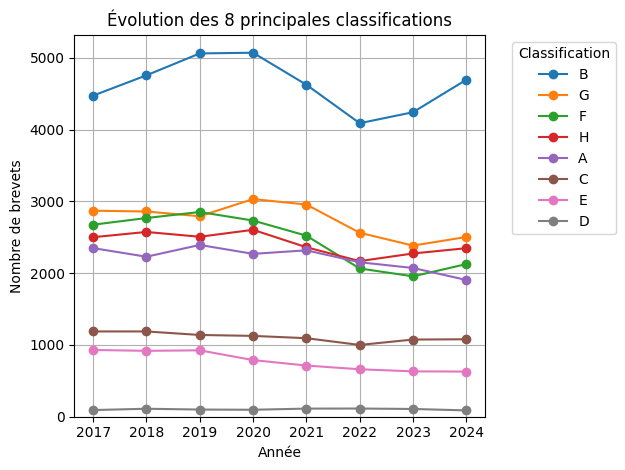

In [36]:
plot_top_classifications(stats_class1, n=8)

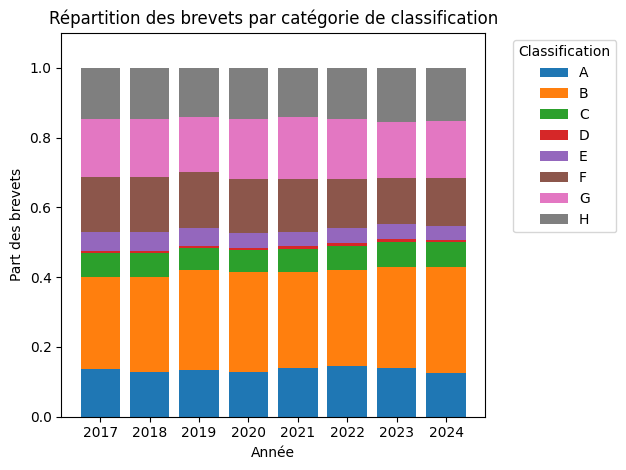

In [37]:
plot_part_classification_par_annee(stats_class1)

On constate que la catégorie B est celle qui revient le plus et que la part des différentes catégories évolue relativement peu dans le temps. Les catégories G, H, F et A se disputent les positions allant de 2 à 5, puis les catégories C, E et D sont moins nombreuses que les autres.

* On réalise la même analyse pour les trois premiers codes de classification.

In [38]:
# Garder que la première lettre de la classification
cols_classif = ["classification_1_text", "classification_2_text", "classification_3_text"]

brevets_class3 = data_brevets_light.copy()
for col in cols_classif:
    brevets_class3[col] = brevets_class3[col].str.extract(r"^([A-Z]\d{2})")

# Créer base compte classification
brevets_class3_long = brevets_class3.melt(
    id_vars=["doc-number", "year"],
    value_vars=cols_classif,
    value_name="classification"
)

brevets_class3_long = brevets_class3_long.dropna(subset=["classification"])

# enlever doublons intra brevets
brevets_class3_long = brevets_class3_long.drop_duplicates(
    subset=["doc-number", "year", "classification"]
)

stats_class3 = (
    brevets_class3_long
    .groupby(["classification", "year"])
    .size()
    .reset_index(name="nombre")
)

stats_class3.head(10)

,classification,year,nombre
0,A01,2017,306
1,A01,2018,269
2,A01,2019,317
3,A01,2020,271
4,A01,2021,266
5,A01,2022,266
6,A01,2023,234
7,A01,2024,231
8,A21,2017,20
9,A21,2018,32


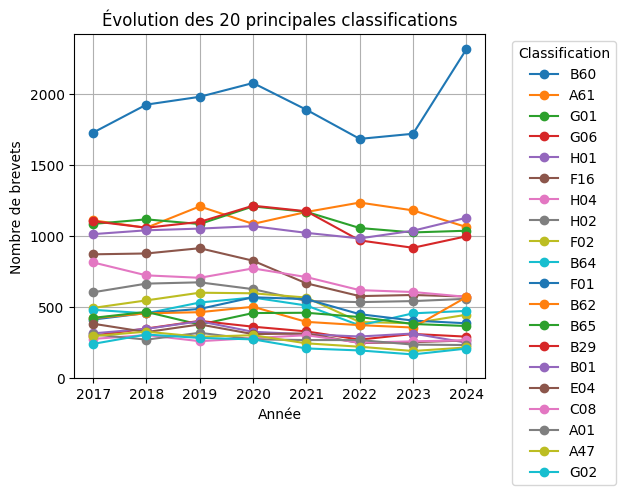

In [39]:
plot_top_classifications(stats_class3, n=20)

* On fait aussi la même analyse pour les **quatre** premiers codes de classification.

In [40]:
# Garder que la première lettre de la classification
cols_classif = ["classification_1_text", "classification_2_text", "classification_3_text"]

brevets_class4 = data_brevets_light.copy()
for col in cols_classif:
    brevets_class4[col] = brevets_class4[col].str.extract(r"^([A-Z]\d{2}[A-Z])")

# Créer base compte classification
brevets_class4_long = brevets_class4.melt(
    id_vars=["doc-number", "year"],
    value_vars=cols_classif,
    value_name="classification"
)

brevets_class4_long = brevets_class4_long.dropna(subset=["classification"])

# enlever doublons intra brevets
brevets_class4_long = brevets_class4_long.drop_duplicates(
    subset=["doc-number", "year", "classification"]
)

stats_class4 = (
    brevets_class4_long
    .groupby(["classification", "year"])
    .size()
    .reset_index(name="nombre")
)

stats_class4.head(10)

,classification,year,nombre
0,A01B,2017,33
1,A01B,2018,24
2,A01B,2019,29
3,A01B,2020,25
4,A01B,2021,31
5,A01B,2022,37
6,A01B,2023,45
7,A01B,2024,25
8,A01C,2017,18
9,A01C,2018,14


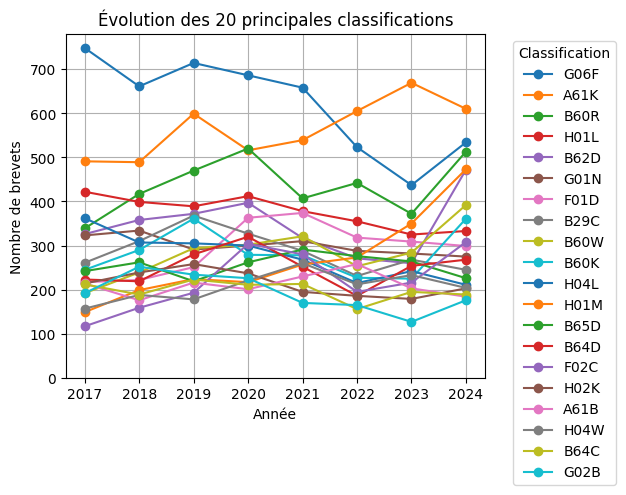

In [41]:
plot_top_classifications(stats_class4, n=20)

[écrire conclusion de cette partie et faire le lien avec le choix des portefeuilles derrière]

<a id='actions'></a>
### 2. Données sur les cours d'actions

<a id='modélisation'></a>
## Modélisation

<a id='conclusion'></a>
## Conclusion et perspectives